In [172]:
import pandas as pd
import numpy as np
import pylab as plt
import datetime 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

import matplotlib.style as style
import matplotlib as mpl

plt.style.use('ggplot')


mpl.style.available

['seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-notebook',
 'classic',
 'seaborn-ticks',
 'grayscale',
 'bmh',
 'seaborn-talk',
 'dark_background',
 'ggplot',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-colorblind',
 'seaborn-deep',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-white',
 'fast',
 'seaborn-pastel',
 'seaborn-dark',
 'tableau-colorblind10',
 'seaborn',
 'seaborn-dark-palette']

In [2]:
#funções utilitárias:

def get(data, coluna): return data.loc[:,[coluna]]

def rss(y,predicted):
    return float(((predicted - y) ** 2.0).sum())

def norm(vetor): return vetor/(vetor.max())

def calc_rss(y, predicted): return rss( norm (y), norm (predicted))

def doMatPlotText(texto, x=0.5, y=0.5, cor='red'): plt.text(x,y, texto, horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor=cor, alpha=0.5))
    
def ordemZero(x, s=500):
    return np.linspace(
        min(x.values.ravel()),
        max(x.values.ravel()), s )[:, np.newaxis]

In [3]:
def knn_plotter(xx,yy,dataset,k=3,tipo='distance', kernel='knn', titulo=" ", sub=False,  dataset_sub=0):
    varXnome = xx
    varYnome = yy
    dataset = dataset
    K=k

    X_knn, Y_knn = ( get(dataset,varXnome), get(dataset,varYnome) )

    KnnModel = KNeighborsRegressor(n_neighbors=K,weights=tipo)
    
    if(kernel!='knn'): KnnModel = kernel

    KnnModel.fit(X_knn, Y_knn )
    
    if(sub): #para subamostras:
         X_knn, Y_knn = ( get(dataset_sub,xx), get(dataset_sub,yy) )
    
  
    Yp_knn = KnnModel.predict( X_knn )
    Yp_knn_interpol = KnnModel.predict( ordemZero( X_knn ) ).flatten()

    knn_rss = 0.0
    r2 = 0.0
    
    if(kernel=='knn'): 
        knn_rss = calc_rss(Y_knn, Yp_knn)
        r2 = r2_score(y_pred=Yp_knn, y_true=Y_knn)
    else:
        knn_rss = calc_rss(Y_knn[yy], Yp_knn)
        r2 = r2_score(y_pred=Yp_knn, y_true=Y_knn)
        
    mlabel = ""
    
    if(kernel=='knn'):
        mlabel =  u"knn rss={0:.3f} r²={1:.3f}".format(knn_rss, r2) 
    else:
        mlabel =  u"rss={0:.3f} r²={1:.3f}".format(knn_rss, r2)     

   

    plt.plot( X_knn, Y_knn, "db", label="origem"); 
    plt.title(titulo)
    plt.plot(ordemZero( X_knn ), 
             Yp_knn_interpol, "--r", label=mlabel); 
    plt.xlabel(varXnome); plt.ylabel(varYnome);
    plt.legend(); plt.grid();
    

In [4]:
base = pd.read_csv('circulacao.csv', sep=";")

In [5]:
base.head(4)

,Unnamed: 0,SECAO_BLOQUEIO,LOCAL,SUB_TRECHO,TRECHO,CORREDOR,PREFIXO,IDANALISE,IDTREM,IDSUBTRECHO,...,CONDUCAO,PERMANECIA,CRUZAMENTO,ANOMALIA,PROPAGACAO,ATIVO,DTVERSION,PUBLICAR,IDANALISEPARTICIONADA,PKID
0,0,ZQBZBV,ZQBZBV,T1 - ZQBZBV/ZDR,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,R67,4258247.0,2745064.0,154.0,...,203.0,0.0,0.0,0.0,0.0,1.0,2019-09-10 12:19:06.000000000,0.0,NaN,253.0
1,1,ZQBZBV,ZQBZBV,T1 - ZQBZBV/ZDR,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,X37,4258313.0,2745154.0,154.0,...,213.0,0.0,0.0,0.0,0.0,1.0,2019-09-10 12:19:06.000000000,0.0,NaN,319.0
2,2,ZQBZBV,ZQBZBV,T1 - ZQBZBV/ZDR,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,L31,4258378.0,2745102.0,154.0,...,237.0,0.0,0.0,0.0,0.0,1.0,2019-09-10 12:19:06.000000000,0.0,NaN,384.0
3,3,ZDR1,ZDR,T0 - ZDR/PCZ,TRECHO 0 - ZPT/PSN-PCZ,NORTE - LARGA,C81,4257853.0,2745334.0,156.0,...,0.0,3789.0,0.0,0.0,0.0,1.0,2019-09-10 12:14:25.000000000,0.0,NaN,128251.0


In [61]:
base.SECAO_BLOQUEIO.value_counts().head(5)

ZXPZFY    812
154ZPS    810
ZYUZST    810
ZPSZCX    809
ZER169    809
Name: SECAO_BLOQUEIO, dtype: int64

In [8]:
sbZQ = base[base.SECAO_BLOQUEIO=='154ZPS']

In [9]:
sbZQ.SECAO_BLOQUEIO.count()

810

In [11]:
sbZQ['TempoP'] = sbZQ.DTFIM -  sbZQ.DTINICIO;

C:\Users\Felipe\Miniconda2\envs\spyder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Variáveis independentes:

In [12]:
 X_att = 'CONDUCAO PERMANECIA CRUZAMENTO ANOMALIA PROPAGACAO'.split( ' ') 

In [13]:
sbZQ.CONDUCAO.describe()

count     810.000000
mean      443.043210
std       125.449163
min         0.000000
25%       406.000000
50%       431.000000
75%       464.000000
max      3077.000000
Name: CONDUCAO, dtype: float64

In [14]:
tree = DecisionTreeRegressor()

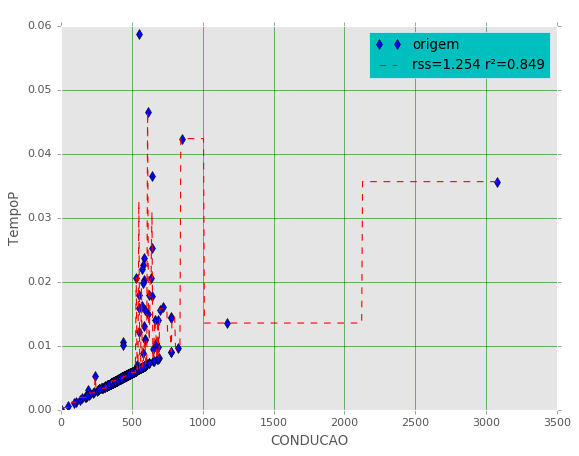

In [188]:
knn_plotter(X_att[0], 'TempoP', dataset=sbZQ, kernel=tree)
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.frameon'] = 1
plt.rcParams['grid.color'] = 'g';
plt.grid(True)

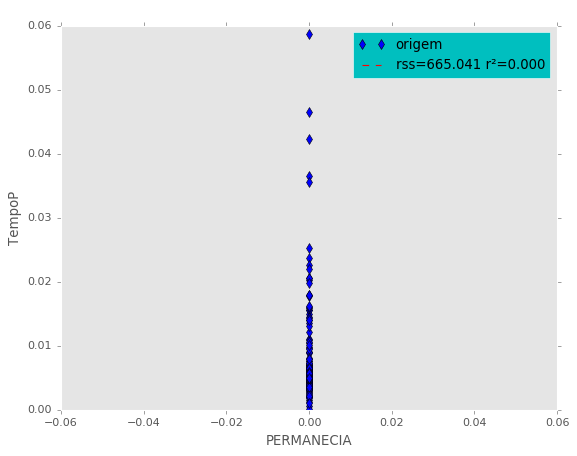

In [190]:
knn_plotter(X_att[1], 'TempoP', dataset=sbZQ, kernel=tree)

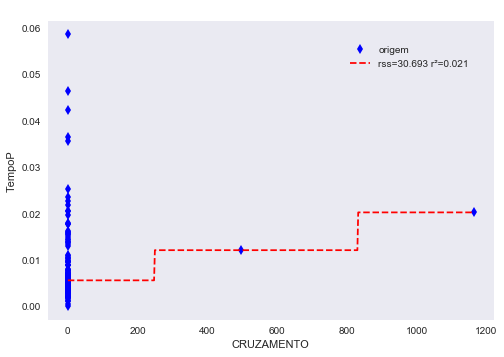

In [150]:
knn_plotter(X_att[2], 'TempoP', dataset=sbZQ[sbZQ.CRUZAMENTO >= 0], kernel=tree)

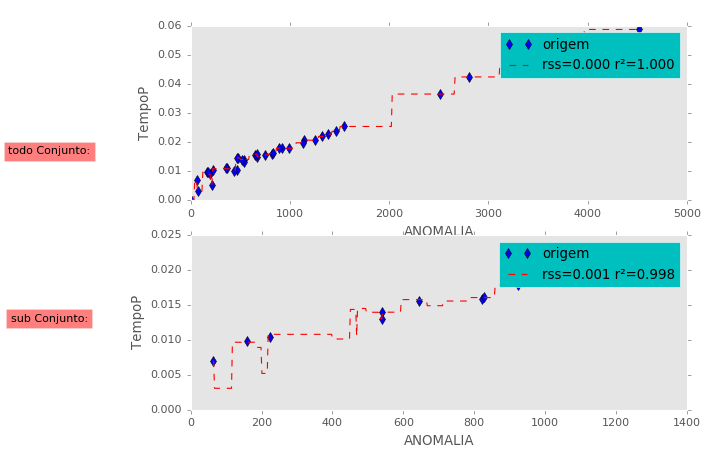

In [191]:
plt.subplot(2,1,1)
knn_plotter(X_att[3], 'TempoP', dataset=sbZQ[sbZQ.ANOMALIA >= 1], kernel=tree)

plt.subplot(2,1,2)
knn_plotter(X_att[3], 'TempoP', dataset=sbZQ[sbZQ.ANOMALIA >= 1].iloc[:100], kernel=tree, sub=True,dataset_sub=sbZQ[sbZQ.ANOMALIA >= 1].iloc[::4] )
doMatPlotText("sub Conjunto:",-400,0.013)
doMatPlotText("todo Conjunto:",-400,0.037)


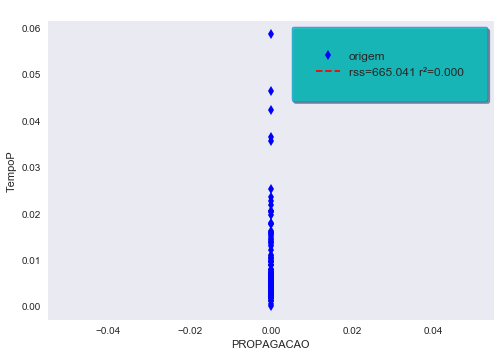

In [168]:
knn_plotter(X_att[4], 'TempoP', dataset=sbZQ[sbZQ.ANOMALIA >= 0], kernel=tree)

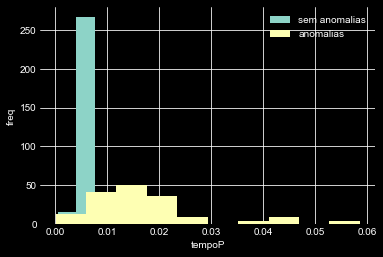

In [91]:
plt.hist(sbZQ[sbZQ.ANOMALIA == 0].TempoP.values, density=True, label="sem anomalias"); plt.grid(); plt.xlabel('tempoP');
plt.hist(sbZQ[sbZQ.ANOMALIA != 0].TempoP.values,bins=10, density=True, label="anomalias"); plt.grid(); plt.xlabel('tempoP');
plt.legend(); plt.grid(); plt.ylabel('freq');
#plt.axis([0,0.6,0,150]);

In [217]:
sbZQB = base[base.SECAO_BLOQUEIO=='ZER169']
serie = sbZQB['DTFIM']  -  sbZQB['DTINICIO']
sbZQB.insert(2, 'TempoP', serie, True)

In [220]:
sbZQB.head()

,Unnamed: 0,SECAO_BLOQUEIO,TempoP,LOCAL,SUB_TRECHO,TRECHO,CORREDOR,PREFIXO,IDANALISE,IDTREM,...,CONDUCAO,PERMANECIA,CRUZAMENTO,ANOMALIA,PROPAGACAO,ATIVO,DTVERSION,PUBLICAR,IDANALISEPARTICIONADA,PKID
54,54,ZER169,0.002350,ZER169,T1 - ZQBZBV/ZPT105,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,X80,4193318.0,2739198.0,...,203.0,0.0,0.0,0.0,0.0,1.0,2019-09-03 00:18:06.000000000,0.0,NaN,4538758.0
68,68,ZER169,0.001366,ZER169,T1 - ZQBZBV/ZPT105,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,X24,4188716.0,2739190.0,...,118.0,0.0,0.0,0.0,0.0,1.0,2019-09-02 12:17:40.000000000,0.0,NaN,4540610.0
114,114,ZER169,0.001539,ZER169,T1 - ZQBZBV/ZPT105,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,X32,4188781.0,2739685.0,...,133.0,0.0,0.0,0.0,0.0,1.0,2019-09-02 12:17:40.000000000,0.0,NaN,4540671.0
243,243,ZER169,0.031435,ZER169,T1 - ZQBZBV/ZDR,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,X93,4182598.0,2740578.0,...,1746.0,0.0,0.0,970.0,0.0,1.0,2019-09-01 18:18:35.000000000,0.0,NaN,4555598.0
737,737,ZER169,0.001817,ZER169,T1 - ZQBZBV/ZPT105,TRECHO 1 - ZBV/ZPT,NORTE - LARGA,M74,4193192.0,2740897.0,...,157.0,0.0,0.0,0.0,0.0,1.0,2019-09-03 00:18:05.000000000,0.0,NaN,4589141.0


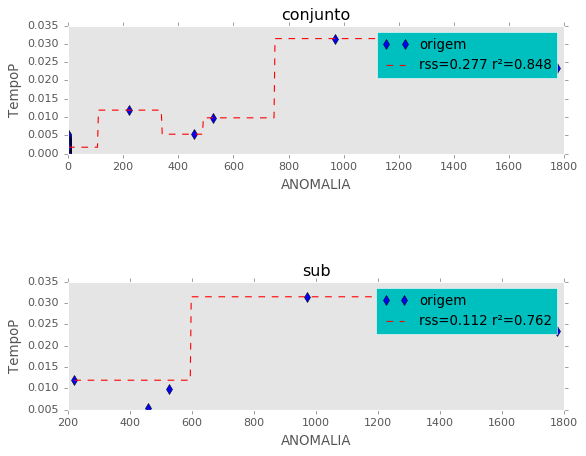

In [219]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
knn_plotter(X_att[3], 'TempoP', dataset=sbZQB[sbZQB.ANOMALIA >= 0], kernel=tree, titulo="conjunto"  )

plt.subplot(2,1,2)
knn_plotter(X_att[3], 'TempoP', dataset=sbZQB[sbZQB.ANOMALIA >= 0].iloc[0:50], kernel=tree, sub=True,dataset_sub=sbZQB[sbZQB.ANOMALIA >= 1].loc[51:] , titulo="sub")
#doMatPlotText("todo Conjunto:",-400,0.9)
#doMatPlotText("sub Conjunto:",-400,0.2)

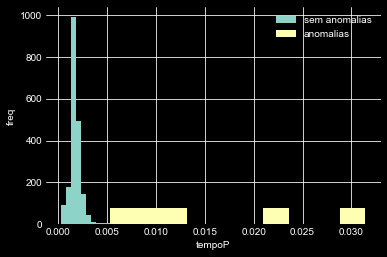

In [93]:
plt.hist(sbZQB[sbZQB.ANOMALIA == 0].TempoP.values, density=True, label="sem anomalias"); plt.grid(); plt.xlabel('tempoP');
plt.hist(sbZQB[sbZQB.ANOMALIA != 0].TempoP.values,bins=10, density=True, label="anomalias"); plt.grid(); plt.xlabel('tempoP');
plt.legend(); plt.grid(); plt.ylabel('freq');
#plt.axis([0,0.6,0,150])